# <center><h1 style = "background-color:Black;"><font color = 'white'>BGMI_Prediction</font></h1></center>

<center><img src = "https://media.giphy.com/media/GfCaemm9bltYQFliLp/giphy.gif?cid=790b7611nr5x1e6hmmb6l9uaq51fio9p0y5q2jgff97y4w4o&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

### Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrang)
4. [Attacking on Anomalies](#Anomalies)
5. [Feature Engineering](#FE)
6. [ML Cat Modelling](#ML)

# <font style = "background-color:Black;"><font color = "orange">Importing Libraries <a class = "anchor" id = "import"></a></font></font>

In [1]:
#basic libraries
import numpy as np
import pandas as pd

#Visulization 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)
import seaborn as sns
import dask.dataframe as dd


#Handling Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#tracking progress
from tqdm import tqdm


# <font style = "background-color:Black;"><font color = "white">Reading Data <a class = "anchor" id = "read"></a></font></font>

In [2]:
# load the data
df = pd.read_csv("C:\\Users\\pushk\\Downloads\\PUBG_Game_Prediction_data.csv")

In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
# data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
# data dimensions
df.shape

(4446966, 29)

# <font style = "background-color:Black;"><font color = "green">Data Wrangling <a class = "anchor" id = "wrang"></a></font></font>

In [6]:
# check row with Null win prediction value
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the row from the data
df.drop(2744604 , inplace = True)

In [8]:
# Preparing a new parameter how many player are in a game
df["playerJoined"] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


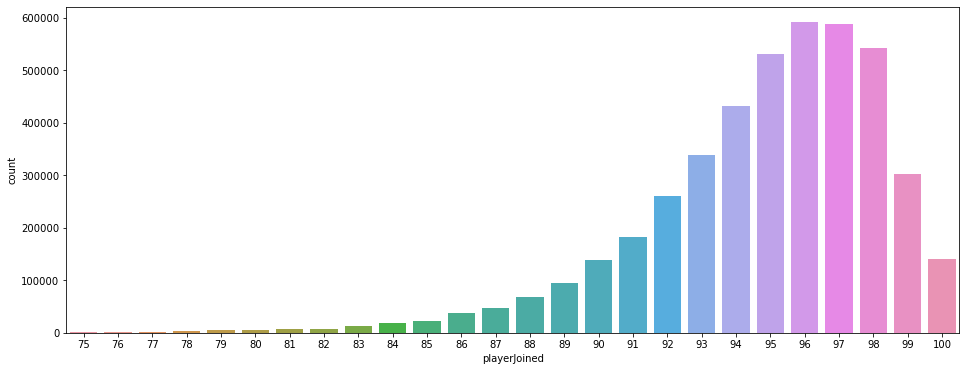

In [10]:
sns.countplot(df[df["playerJoined"]>=75]["playerJoined"])
plt.show()

# <font style = "background-color:Black;"><font color = "orange">Attacking on Anomalies <a class = "anchor" id = "Anomalies"></a></font></font>

# Kills Without Moving

# <center><img src = "https://media.giphy.com/media/7TTWKxyPlG48HWYfi5/giphy.gif?cid=790b76118tfdgxbg1o81ltrzpe4dbjit5xwshhnu4j43523t&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

In [11]:
# Kills Without Moving
# prepare  a data parameter to gather the information of the total distance teavelled 
df["totalDistance"] = df["swimDistance"]+df["walkDistance"]+df["rideDistance"]

# prepare a data parameter to check for anomaly detection that the person has not moved but still managed to do the kills

df["killsWithoutMoving"] = ((df["kills"]>0) & (df["totalDistance"] == 0))

In [12]:
df[df["killsWithoutMoving"] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df["killsWithoutMoving"] == True].shape

(1535, 32)

In [14]:
# drop the anomally
df.drop(df[df["killsWithoutMoving"] == True].index, inplace = True)

# Extra-Ordinary Road Kills !!!!

# <center><img src = "https://media1.tenor.com/m/Qz_WZAauJRUAAAAd/pubg-car.gif"></center>

In [15]:
df[df["roadKills"]>5].shape

(46, 32)

In [16]:
df.drop(df[df["roadKills"]>5].index , inplace = True)

# These many kills - how???

# <center><img src = "https://media1.tenor.com/m/kX7jKETTBn8AAAAC/pubg-mobile-tdm.gif"></center>

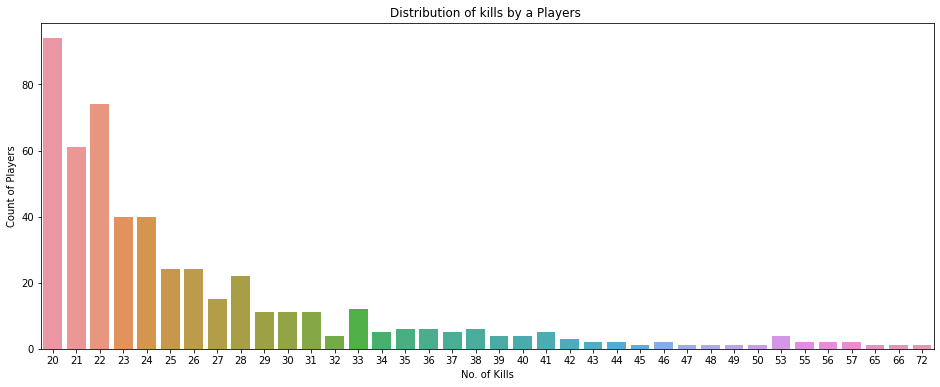

In [17]:
sns.countplot(df[df['kills']>=20]['kills']).set_title("Distribution of kills by a Players ")
plt.ylabel("Count of Players")
plt.xlabel("No. of Kills")
plt.show()

In [18]:
# chechking data dimensions
df[df['kills']>=20].shape

(511, 32)

In [19]:
# delete the data 
df.drop(df[df['kills']>=20].index, inplace = True)

# Head Shot Rate

# <center><img src = "https://media1.tenor.com/m/zTsmJ8JnZaIAAAAd/headshot-playerunknowns-battlegrounds.gif"></center>

In [20]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

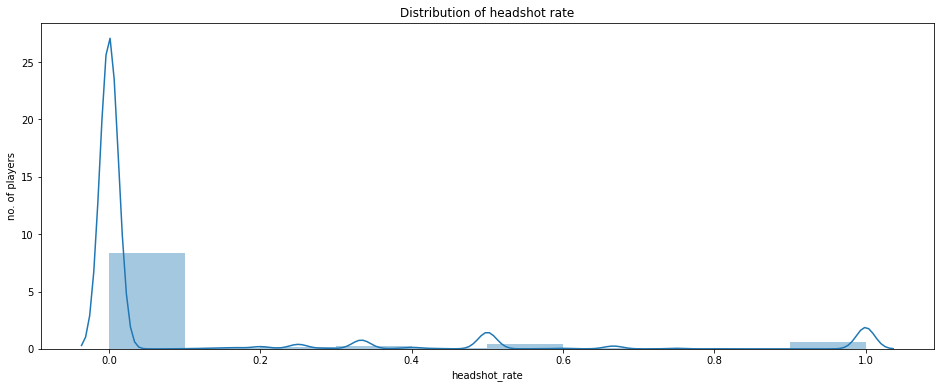

In [21]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins = 10).set_title("Distribution of headshot rate")
plt.ylabel('no. of players')
plt.show()

In [22]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [23]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index, inplace = True)

# Binocular Kill

# <center><img src = "https://media1.tenor.com/m/8ur8rZoykHgAAAAd/pubg-gun.gif"></center>

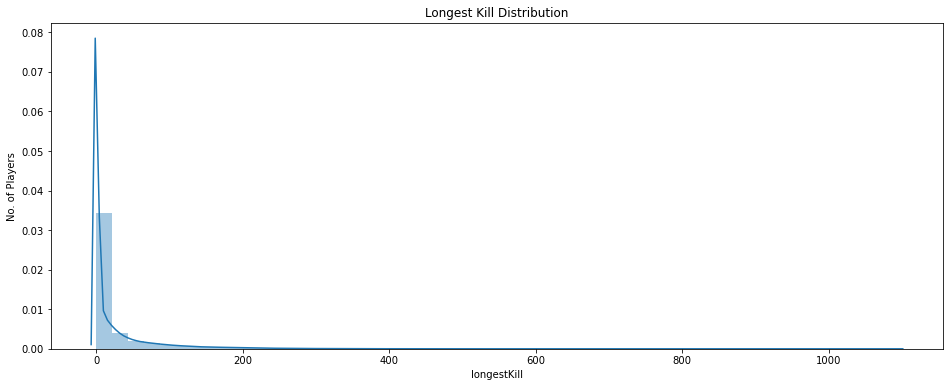

In [24]:
sns.distplot(df['longestKill'], bins = 50).set_title('Longest Kill Distribution')
plt.ylabel('No. of Players')
plt.show()

In [25]:
df[df['longestKill']>=500].shape

(1735, 33)

In [26]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

# Weapons Acquired 

# <center><img src = "https://media.giphy.com/media/BcAK29jGxEaIxUx3QG/giphy.gif"></center>

In [27]:
df[df['weaponsAcquired']>=15].shape

(6755, 33)

In [28]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

# EDA

In [29]:
df.shape

(4436196, 33)

In [30]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playerJoined          0
totalDistance         0
killsWithoutMoving    0
headshot_rate         0
dtype: int64

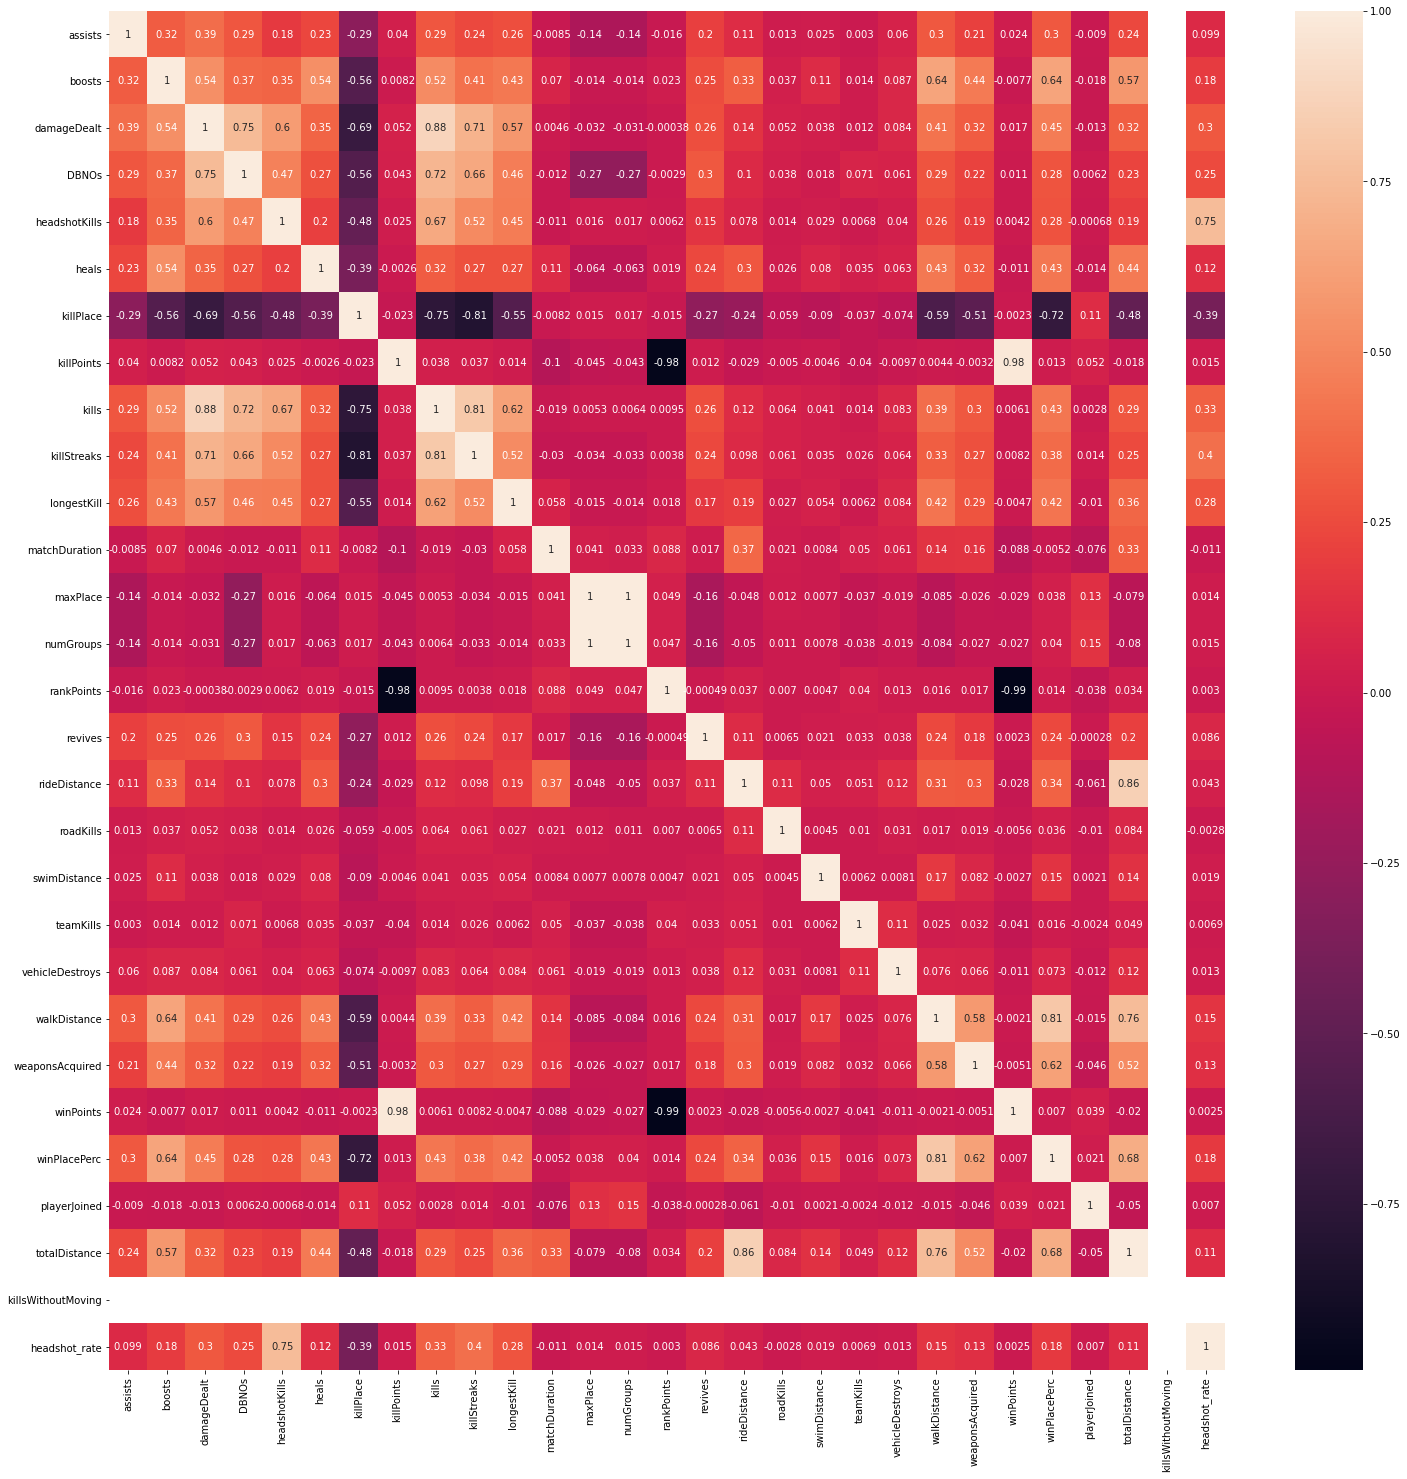

In [31]:
# Checking correlation with win prediction percentile
plt.figure(figsize = [25,25])
sns.heatmap(df.corr(), annot = True)
plt.show()

# <font style = "background-color:Black;"> <font color = white >Feature Engineerig<a class = "anchor" id = "FE"></font></font>

In [32]:
normalising_factor = (100 - df['playerJoined']/100)+1
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['healsnboost'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [33]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerJoined',
       'totalDistance', 'killsWithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm', 'healsnboost',
       'assist'],
      dtype='object')

In [34]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance' , 'swimDistance'
        , 'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration' ] )

In [35]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerJoined,totalDistance,killsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,0,0


# <font style = "background-color:Black;"> <font color = Green >ML Cat Modelling<a class = "anchor" id = "ML"></font></font>


Handling Categorical data

In [43]:
x = data.drop(['winPlacePerc'], axis =1 )
y = data['winPlacePerc']

feature = x.columns

In [44]:
x = pd.get_dummies(x, columns = ['matchType', 'killsWithoutMoving'])

In [45]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [46]:
x.shape

(4436196, 39)

Scaling The data

In [49]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame

MemoryError: Unable to allocate 1.29 GiB for an array with shape (39, 4436196) and data type float64

In [42]:
x.head

<function pandas.core.generic.NDFrame.head(self: 'FrameOrSeries', n: 'int' = 5) -> 'FrameOrSeries'>